<a href="https://colab.research.google.com/github/gedeck/mistat-code-solutions/blob/main/IndustrialStatistics/notebooks/Chap008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
!pip install mistat --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 6.0 MB/s eta 0:00:00


# Cybermanufacturing and Digital Twins

In [2]:
import mistat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

## Introduction to Cybermanufacturing

## Cybermanufacturing Analytics

## Information Quality in Cybermanufacturing

### Bayesian Networks

### CUB Models

### Control Charts

/usr/local/lib/python3.10/dist-packages/mistat/qcc/qualityControlChart.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.center = float(center or self.stats.center)
/usr/local/lib/python3.10/dist-packages/mistat/qcc/qualityControlChart.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.center = float(center or self.stats.center)


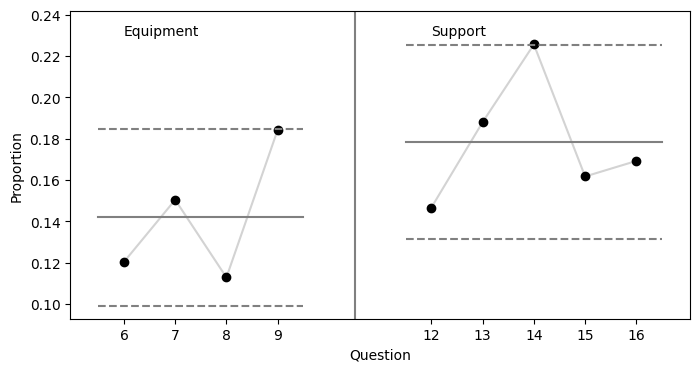

In [3]:
abc = mistat.load_data('ABC')
equipment = ['q6', 'q7', 'q8', 'q9']
support = ['q12', 'q13', 'q14', 'q15', 'q16']
top5counts = (abc[equipment + support] == 5).sum()

qcc1 = mistat.QualityControlChart(top5counts[equipment], qcc_type='np',
                                 sizes=len(abc), nsigmas=2)
qcc2 = mistat.QualityControlChart(top5counts[support], qcc_type='np',
                                 sizes=len(abc), nsigmas=2)

qcc1.data = qcc1.data / len(abc)
qcc1.center = qcc1.center / len(abc)
qcc1.limits = qcc1.limits / len(abc)
qcc2.data = qcc2.data / len(abc)
qcc2.center = qcc2.center / len(abc)
qcc2.limits = qcc2.limits / len(abc)

fig, ax = plt.subplots(figsize=(8, 4))
subsets = [
    {'x': np.array(range(6, 10)), 'qcc': qcc1},
    {'x': np.array(range(12, 17)), 'qcc': qcc2 },
]
for subset in subsets:
    qcc = subset['qcc']
    x = subset['x']
    ax.plot(x, qcc.data.values, color='lightgrey',
            marker='o', markeredgecolor='black', markerfacecolor='black')
    ax.plot((np.min(x)-0.5, np.max(x)+0.5), (qcc.center, qcc.center),
            color='grey')
    for limit in qcc.limits.values:
        ax.plot((np.min(x)-0.5, np.max(x)+0.5), (limit, limit),
            color='grey', ls='--')
ax.set_xticks(np.concatenate([subsets[0]['x'], subsets[1]['x']]))
ax.set_xlabel('Question')
ax.set_ylabel('Proportion')
ax.axvline(10.5, color='gray')
ax.text(6, 0.23, 'Equipment')
ax.text(12, 0.23, 'Support')
ylim = list(ax.get_ylim())
ylim[1] = ylim[1] + 0.01
ax.set_ylim(ylim)

plt.show()

## Modeling in Cybermanufacturing

## Computational Pipelines

## Digital Twins

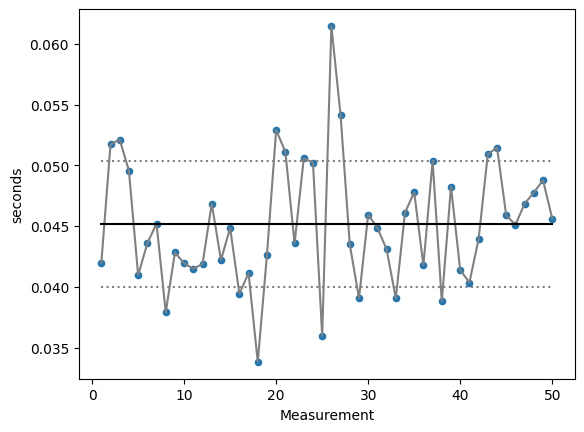

In [4]:
# Individual measurements of cycle time with all factors at center
midRange = {'m': 45, 's': 0.0125, 'k': 3_000, 't': 293, 'p0': 100_000, 'v0': 0.006, 't0': 350}
experiment = mistat.PistonSimulator(n_simulation=50, seed=1, **midRange)
Ps = experiment.simulate()
Ps['Measurement'] = np.arange(1, 51)

def addStatsLines(xlim, data, ax, color='grey'):
    stMean = np.mean(data)
    std = np.std(data)
    ax.plot(xlim, (stMean, stMean), color='black')
    ax.plot(xlim, (stMean-std, stMean-std), color=color, linestyle=':')
    ax.plot(xlim, (stMean+std, stMean+std), color=color, linestyle=':')

ax = Ps.plot.scatter(x='Measurement', y='seconds')
ax.plot(Ps['Measurement'], Ps['seconds'], color='grey')
addStatsLines((1, 50), Ps['seconds'], ax)
plt.show()

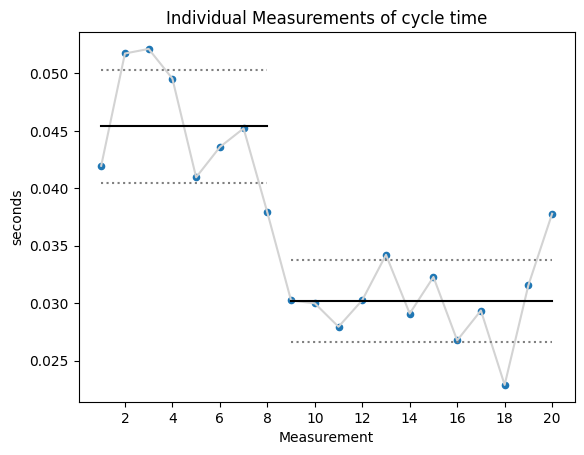

In [5]:
v0changes = dict(midRange)
v0changes['v0'] = [v0changes['v0']] * 8 + [0.0045] * 42

experiment = mistat.PistonSimulator(n_simulation=50, seed=1, **v0changes)
_ = experiment.simulate()

sensorData = experiment.actuals
sensorData['Measurement'] = np.arange(1, len(sensorData) + 1)
sensorDataShort = sensorData.iloc[:20, :]

ax = sensorDataShort.plot.scatter(x='Measurement', y='seconds', title='Individual Measurements of cycle time')
ax.plot(sensorDataShort['Measurement'], sensorDataShort['seconds'], color='lightgrey')
addStatsLines((1, 8), sensorDataShort['seconds'][:8], ax)
addStatsLines((9, 20), sensorDataShort['seconds'][8:], ax)
ax.set_xticks(np.arange(2, 20+1, 2))
plt.show()

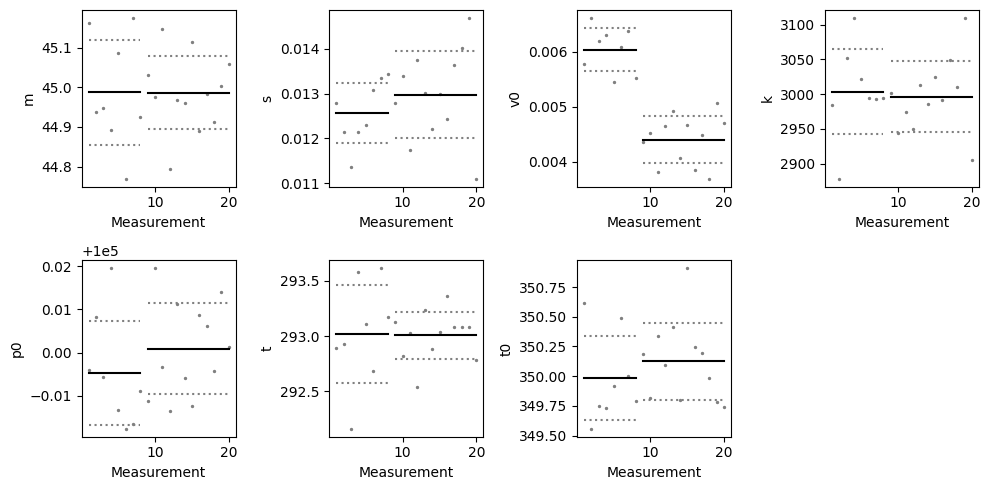

In [6]:
factors = ['m', 's', 'v0', 'k', 'p0', 't', 't0']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
ymin, ymax = None, None
for ax, factor in itertools.zip_longest(itertools.chain.from_iterable(axes), factors):
    if factor is None:
        ax.set_axis_off()
        continue

    ax.scatter(sensorDataShort['Measurement'], sensorDataShort[factor], s=2, color='grey')
    addStatsLines((1, 8), sensorDataShort[factor][:8], ax)
    addStatsLines((9, 20), sensorDataShort[factor][8:], ax)
    ax.set_xlabel('Measurement')
    ax.set_ylabel(factor)

plt.tight_layout()
plt.show()

In [7]:
from mistat.design import doe

Factors = {
    'm': (30, 60),
    's': (0.005, 0.02),
    'k': (1_000, 5_000),
    't': (290, 296),
    'p0': (90_000, 110_000),
    'v0': (0.002, 0.01),
    't0': (340, 360),
}
Design = doe.lhs(Factors, num_samples=1280)
Design = Design.to_dict(orient = 'list')
experiment = mistat.PistonSimulator(n_simulation=1, seed=1, **Design)
experimentData = experiment.simulate()

{'regressor__mlpregressor__hidden_layer_sizes': (4,)}


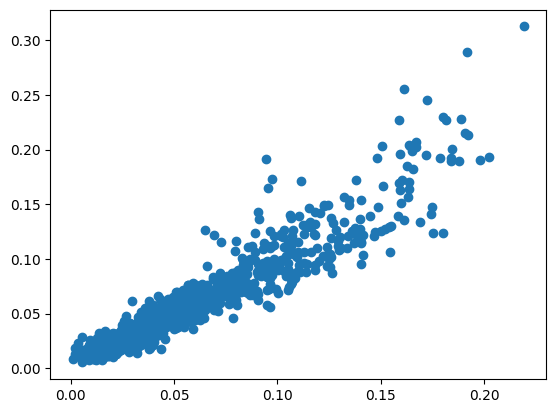

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

predictors = ['m', 's', 'k', 't', 'p0', 'v0', 't0']
X = experimentData[predictors]
y = experimentData['seconds']

param_grid = {'regressor__mlpregressor__hidden_layer_sizes': [tuple([i+1]) for i in range(2, 10)]}

base_estimator = TransformedTargetRegressor(
    regressor=make_pipeline(
        MinMaxScaler(),
        MLPRegressor(
            max_iter=1000,
            activation='tanh',
            hidden_layer_sizes=(1, ),
            learning_rate_init=0.01,
            early_stopping=True,
            random_state=0,
        )
    ),
    transformer=MinMaxScaler(),
)

model = GridSearchCV(base_estimator, param_grid, cv=5)
model.fit(X, y)

print(model.best_params_)
model.best_estimator_

fig, ax = plt.subplots()
ax.scatter(model.predict(X), y)
plt.show()

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

predictors = ['m', 's', 'k', 't', 'p0', 'v0', 't0']
X = experimentData[predictors]
y = experimentData['seconds']

# create a pipeline that first scales the predictors to the range 0 to 1
# followed by a neural network model. The outcome variable is also
# rescaled to a range of 0 to 1. This is achieved using TransformedTargetRegressor.
model = TransformedTargetRegressor(
    regressor=make_pipeline(
        MinMaxScaler(),
        MLPRegressor(max_iter=1000, activation='tanh',
            hidden_layer_sizes=(5, ), learning_rate_init=0.01,
            early_stopping=True, random_state=0,
        )
    ),
    transformer=MinMaxScaler(),
)
_ = model.fit(X, y)

In [10]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=0)
result.importances_mean
result.importances_std
permImportance = pd.DataFrame({
    'predictor': predictors,
    'mean': result.importances_mean,
    'std': result.importances_std,
    'low': result.importances_mean - result.importances_std,
    'high': result.importances_mean + result.importances_std,
})
permImportance

,predictor,mean,std,low,high
0,m,0.012862,0.002442,0.010420,0.015303
1,s,0.963748,0.030664,0.933084,0.994412
2,k,0.049424,0.002839,0.046584,0.052263
3,t,0.005547,0.001427,0.004120,0.006974
4,p0,0.004668,0.001499,0.003169,0.006168
5,v0,0.901699,0.050506,0.851194,0.952205
6,t0,0.000954,0.000569,0.000384,0.001523


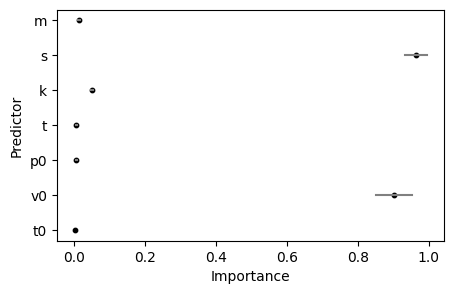

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))
for _, row in reversed(list(permImportance.iterrows())):
    p = row['predictor']
    ax.plot((row['low'], row['high']), (p, p), color='grey')
ax.scatter(permImportance['mean'], permImportance['predictor'], color='black', s=10)
ax.set_xlabel('Importance')
ax.set_ylabel('Predictor')
plt.show()

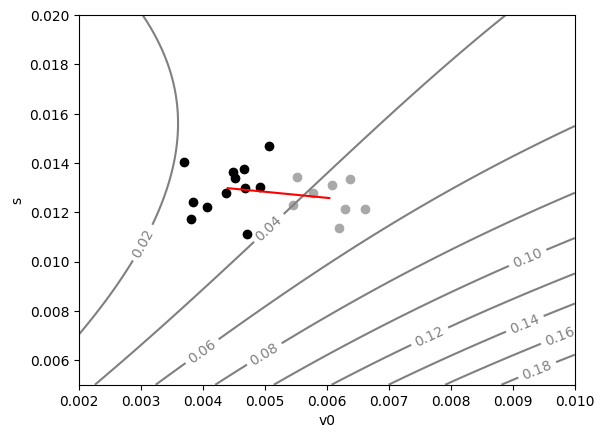

In [12]:
sensorDataMean = dict(sensorData.mean())

def plotResponseSurface(model, levels):
    steps = 100
    x1 = np.linspace(*(Factors['v0']), steps)
    x2 = np.linspace(*(Factors['s']), steps)
    X1, X2 = np.meshgrid(x1, x2)
    gridData = dict(sensorDataShort.mean())
    gridData = pd.DataFrame({
        **sensorDataMean, # use mean values of all other factors from the sensorData
        's': X2.ravel(),
        'v0': X1.ravel(),
    })
    gridData = gridData[list(Factors)]
    responses = model.predict(gridData)
    CS = plt.contour(x1, x2, responses.reshape(steps, steps),
                sorted(list(levels)), colors='gray')
    ax = plt.gca()
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_xlabel('v0')
    ax.set_ylabel('s')
    return ax
ax = plotResponseSurface(model, np.arange(0.0, 0.2, 0.02))
ax.plot([np.mean(sensorDataShort['v0'][:8]), np.mean(sensorDataShort['v0'][8:])],
        [np.mean(sensorDataShort['s'][:8]), np.mean(sensorDataShort['s'][8:])], color='red')
ax.scatter(sensorDataShort['v0'][:8], sensorDataShort['s'][:8], color='darkgrey')
ax.scatter(sensorDataShort['v0'][8:], sensorDataShort['s'][8:], color='black')
plt.show()

In [13]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from statsmodels.tsa.api import SARIMAX

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

results = None
best = None
# generate all combinations of (p, d, q) triplets and keep the model
# with the lowest AIC
for param in list(itertools.product(p, d, q)):
    mod = SARIMAX(sensorDataShort['v0'], order=param)
    temp = mod.fit(method='nm', maxiter=600, disp=False)
    if results is None or results.aic > temp.aic:
        results = temp
        best = param
print('ARIMA{} - AIC:{}'.format(best, results.aic))

ARIMA(2, 0, 0) - AIC:-226.33201069362354


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


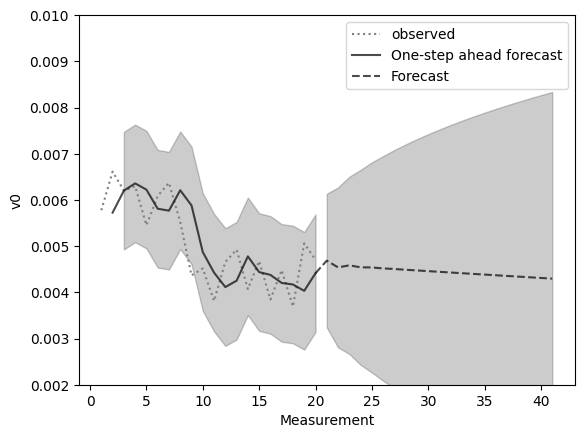

In [14]:
def addSARIMAX_predictions(predictions, ax, label=None, linestyle=None):
    pred_mean = predictions.predicted_mean
    pred_mean.index = pred_mean.index + 1
    pred_mean.plot(ax=ax, label=label, alpha=0.7, color='black', linestyle=linestyle)
    pred_ci = predictions.conf_int()
    pred_ci.index = pred_ci.index + 1
    ax.fill_between(pred_ci.index[1:],
                    pred_ci['lower v0'].iloc[1:], pred_ci['upper v0'].iloc[1:],
                    color='k', alpha=0.2)

ax = sensorDataShort[['Measurement', 'v0']].plot(x='Measurement', y='v0', label='observed',
                                                 color='grey', linestyle=':')
predictions = results.get_prediction(start=1)
addSARIMAX_predictions(predictions, ax, label='One-step ahead forecast')
forecast = results.get_prediction(start=19, end=40, dynamic=True, full_results=True)
addSARIMAX_predictions(forecast, ax, label='Forecast', linestyle='--')

ax.set_xlabel('Measurement')
ax.set_ylabel('v0')
ax.set_ylim(0.002, 0.01)
plt.legend()

plt.show()

## Chapter Highlights

## Exercises